# Аналитика успешности игр

В данном исследовании необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. На данный момент собраны данные на 2016 год, кампания планиурется на 2017 год.

**Описание данных**
Датасет в данном случае один и имеет следующий путь: `/datasets/games.csv`

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы**
1. Провести предварительный обзор данных;
2. Провести предобработку данных;
3. Провести исследовательский анализ данных;
4. Составить портрет пользователя каждого региона;
5. Сформулировать гипотезы и проработать их;
6. Сформулировать общий вывод.

## Обзор данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

### Загрузка данных

In [2]:
df = pd.read_csv('/datasets/games.csv')

### Получение общей информации

In [3]:
#Оценим внешний вид данных
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Оценим характеристики столбцов в датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Оценим числовые значения, есть ли вбросы
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод по обзору данных

После предварительного обзора данных можно сделать следующие выводы:
- Всего в датасете 16715 строк и 11 столбцов;
- Необходимо привести названия столбцов к единому стилю;
- Необходимо проверить данные на дубликаты;
- Необходимо по максимуму избавиться от пропусков в данных;
- Необходимо првоерить данные на вбросы (числа в продажах выглядят подозрительными)
- Неоходимо изменить тип данных в некоторых столбцах на более оптимальный;
- Добавить дополнительный столбец с общими продажами.

Данные являются пригодными для исследования.

## Предобработка данных

### Названия столбцов

Всего в датасете 11 столбцов, все из них начинаются с большой буквы, поэтому необходимо изменить названия у них всех. Поскольку других претензий к названиям нет достаточно будет воспользоваться методом lower().

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Дубликаты в данных

#### Явные дубликаты

Проверим датасет на наличие явных дубликатов

In [7]:
df.duplicated().sum()

0

#### Неявные дубликаты

Явных дубликатов нет, проверим на неявные дубликаты. Первой идеей было вывести уникальные значение столбца name, но когда вспомнил, что значений 16к, передумал). Пошел более точечно по столбцам, которые идентифицируют любую игру: название, платформа для работы, год релиза и жанр.

In [8]:
df[df.duplicated(['name', 'platform', 'year_of_release', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [9]:
#Избавимся от дубликатов в данных столбцах и проверим их количество после удаления
df.drop_duplicates(['name', 'platform', 'year_of_release', 'genre'], inplace=True)
df.duplicated(['name', 'platform', 'year_of_release', 'genre']).sum()

0

### Пропуски в данных

#### Общее количество

In [10]:
#Для начала проверим количество пропусков в нашем датасете
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

#### Столбец  `name`

Пропуск в столбце с названиями выглядит очень странным, поскольку мы сомнительно сможем как-то идентифицировать название в этом столбце, удалим эту строку из датасета. Значительного влияния на выборку это не окажет.

In [11]:
df.dropna(subset=['name'], inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### Столбец `year_of_release`

Пропуски в столбце года релиза мы тоже вряд ли сможем заполнить какими-то значениями, нет необходимой информации. Количество таких пропусков около 1 процента, на выборку их удаление не повлияет.

In [12]:
df.dropna(subset=['year_of_release'], inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

#### Столбец `critic_score`

Пропуски в столбце critic_score занимают половину всех значений, заменить их на среднее, медиану или моду мы не сможем, так как это субъективные оценки, которые могут зависеть от множества факторов игры. В данном случае у нас таких факторов нет в датасете. Вероятно, отсутствие оценки говорит о том, что игру никто еще не оценил, поэтому заменим пропуски на -1, чтобы точно видеть значения без оценки и чтобы их было легче идентифицировать при дальнейшем анализе.

In [13]:
df['critic_score'].fillna(value=-1, inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating             6676
dtype: int64

#### Столбец `user_score`

Пропуски в столбце user_score занимают 40 процентов всей выборки, логика аналогичная столбцу critic_score. Заменим пропуски на -1, потому что если там уже есть нули это может исказить данные.

In [14]:
df['user_score'].fillna(value=-1, inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Помимо пропусков в данном столбце присутствует значение "tbd", означающее "to be defined", заменим ее так же на -1.

In [15]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

#### Столбец `rating`

Пропуски в столбце rating занимают около 40 процентов выборки, возрастной рейтинг зависит от контента игры. По имеющимся свойствам мы не можем это определить, поэтому заменим возрастной рейтинг на 'unknown'.

In [16]:
df['rating'].fillna(value='unknown', inplace=True)
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Вбросы в данных

При первоначальном обзоре было замечено, что в столбцах продаж различных регионов, есть очень выбивающиеся максимальные занчения. Было решено проверить эти строки более подробно, чтобы принять решение, удалить их из выборки или же нет.

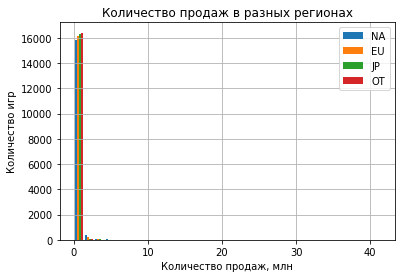

In [17]:
plt.hist([df['na_sales'], df['eu_sales'], df['jp_sales'], df['other_sales']], bins = 30, label=['NA', 'EU', 'JP', 'OT'])
plt.title('Количество продаж в разных регионах')
plt.legend(loc='upper right')
plt.xlabel('Количество продаж, млн')
plt.ylabel('Количество игр')
plt.grid()
plt.show()

In [18]:
df[df['na_sales'] == df['na_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [19]:
df[df['eu_sales'] == df['eu_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [20]:
df[df['jp_sales'] == df['jp_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.0,-1.0,-1,unknown


In [21]:
df[df['other_sales'] == df['other_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.4,0.41,10.57,95.0,9,M


**Вывод**

Как было замечено, в Северной Америке и Европе наибольшее количество скачиваний было у игры Wii Sports на платформе Wii, данная игра шла в комплекте с продаваемой приставкой Nintendo, из чего можно сделать вывод о том, что такие скачивания связаны с покупками приставок Nintendo.

Игра Pokemon Red/Pokemon Blue является действительно такой популярной, она даже попала в книгу рекордов Гиннеса по количеству скачиваний.

GTA: San Andreas - вечная классика, судя по оценкам и критиков и игроков, после выхода на компьютерах прозошел ажиотаж по скачиванию на PlayStation2.

Все данные игры можно назвать очень популярными среди пользователей, они имеют почти полностью заполенные данные, и было выяснено, что значения в скачиваниях не были вызваны ошибкой или сбоем, это в реальности так. Данные значения оставляем для выборки, потому что это может нести некоторую полезную информацию для исследования.

### Типы данных

Многие типы данных необходимо преобразовать в другие типы данных для более оптимального использования памяти, а также для дальнейшей удобной работы, например объектный тип перевести в числовой для возможности работы с этим свойством как с числом.

- `year_of_release` float64 -> uint16 (нет необходимости в таком типе, год всегда целый и положительный)
- `critic_score`    float64 -> float32 (нет необходимости в таком количестве памяти)
- `user_score`      object -> float32 (необходимо будет работать с данным столбцом как с числами)

In [22]:
df['year_of_release'] = df['year_of_release'].astype('uint16')
df['critic_score'] = df['critic_score'].astype('float32')
df['user_score'] = df['user_score'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  uint16 
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float32
 9   user_score       16443 non-null  float32
 10  rating           16443 non-null  object 
dtypes: float32(2), float64(4), object(4), uint16(1)
memory usage: 1.3+ MB


### Добавление столбца

In [23]:
df['world_sales'] = df[['eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,41.18
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,11.16
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,19.84
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,17.16
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,20.11


### Вывод

В ходе предобработки данных были сделаны следующие выводы:
- Были изменены названия столбцов;
- Явных дубликатов обнаружено не было;
- Неявных дубликатов обнаружено 2, они были удалены;
- Были обработаны пропуски в данных:
    - В столбцах `name` и `year_of_release` строки с пропусками были удалены;
    - В столбце `rating` пропуски были заменены на 'unknown';
    - В столбцах `critic_score` и `user_score` пропуски были заменены на -1;
    - В случае с удаленнными строками, пропуски были вызваны вероятно техническими проблемами;
    - В случае столбцов `critic_score` и `user_score`, вероятно рейтинг для данных игр или никогда не составлялся или был еще в процессе.
- Были изучены вбросы в данных в столбцах с количеством продаж и было выяснено, что это реальные значения, поэтому они были оставлены;
- Были изменены типы данных в столбцах `year_of_release`, `critic_score` и `user_score` для оптимальной работы с датасетом;
- Был добавлен дополнительный столбец `world_sales` - мировые продажи, полученный суммой значений из столбцов продаж из различных регионов.

## Исследовательский анализ данных

### Исследование выпуска игр по годам

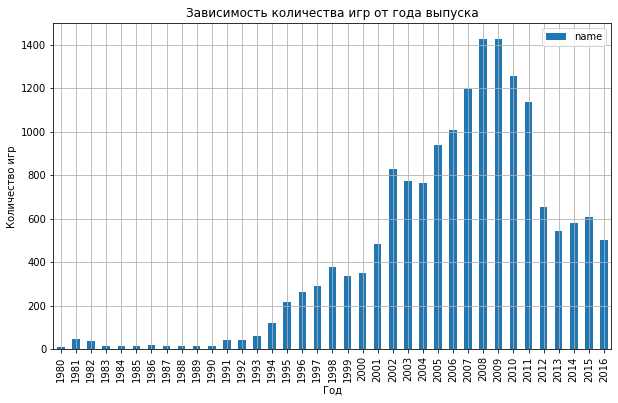

In [24]:
(
    df.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(10,6))
)

plt.title('Зависимость количества игр от года выпуска')
plt.xlabel('Год')
plt.ylabel('Количество игр');

Для более наглядного представления числовых значений, создадим таблицу со всеми значениями.

In [25]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


**Вывод**

По исследования выпуска игр по годам можно сделать следующие выводы:
- Выпуск игр представлен от 1980 года по 2016 год;
- Подъем выпуска игр наблюдается с 1990, когда начинали распроняться компьютеры и другая игровая техника;
- После 1990 года количество релизов увеливалось до 2008-2009 года, здесь мы видим пик, однако после этого постепенно снижалось;
- Начиная с 2012 года количество релизов находится на примерно одном уровне;
- Для нашего прогноза на 2017 год, лучше взять игры за последние 5 лет, то есть с 2011 года, потому что хоть и есть легендарные игры, которые даже спустя 20 лет могут нравиться людям, но большинство из них уже не оказывают значительного влияния на рынок.

### Исследование платформ

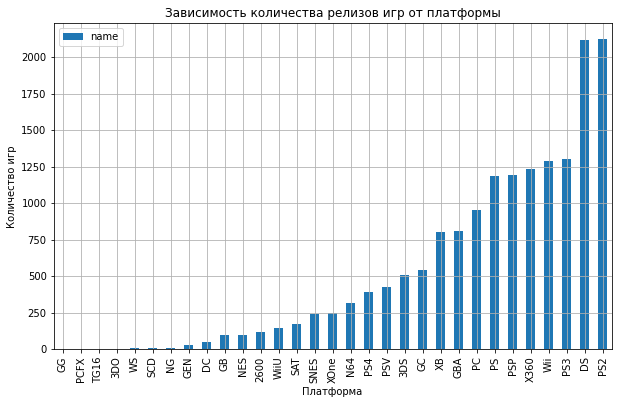

In [26]:
(
    df.pivot_table(index='platform', values='name', aggfunc='count')
    .sort_values(by='name', ascending=True)
    .plot(kind='bar', grid=True, figsize=(10,6))
)

plt.title('Зависимость количества релизов игр от платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество игр');

Для дальнейшего исследования возьмем 10 наиболее популярных платформ и оценим их по годам.

In [27]:
top_platforms = list(df.pivot_table(index='platform', values='name', aggfunc='count')
                  .sort_values(by='name', ascending=False)
                  .head(10)
                  .reset_index()['platform'])
top_platforms

['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB']

PS2
                 world_sales
year_of_release             
2000                   23.09
2001                   86.94
2002                  108.84
2003                  100.77
2004                  115.03
2005                   75.06
2006                   53.49
2007                   43.94
2008                   32.67
2009                   17.04
2010                    3.45
2011                    0.32 


DS
                 world_sales
year_of_release             
1985                    0.02
2004                    8.94
2005                   82.15
2006                   69.80
2007                   71.69
2008                   67.19
2009                   58.59
2010                   44.22
2011                   11.91
2012                    6.99
2013                    0.97 


PS3
                 world_sales
year_of_release             
2006                   12.12
2007                   41.03
2008                   61.29
2009                   68.28
2010                   81.

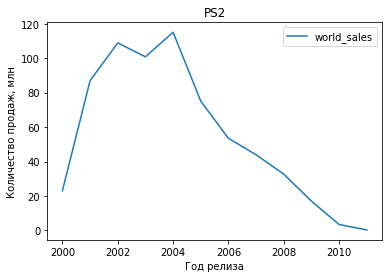

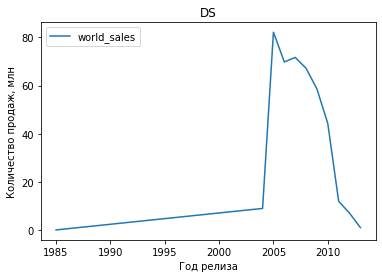

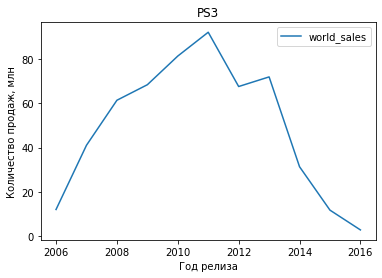

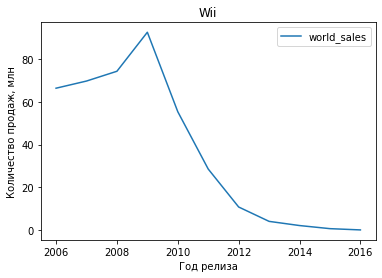

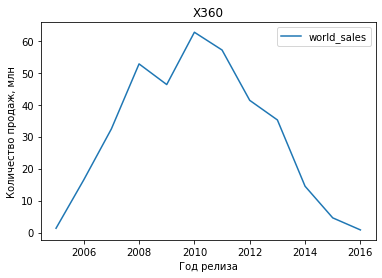

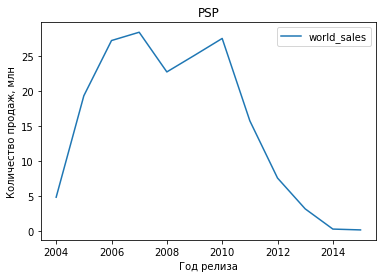

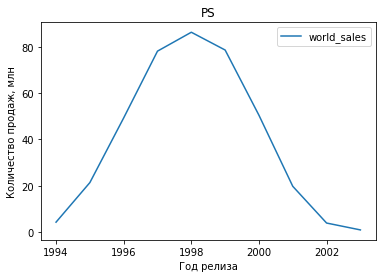

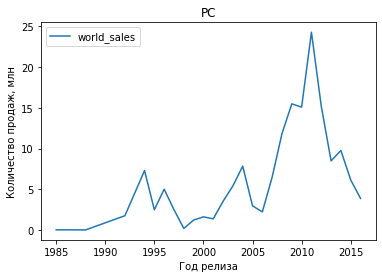

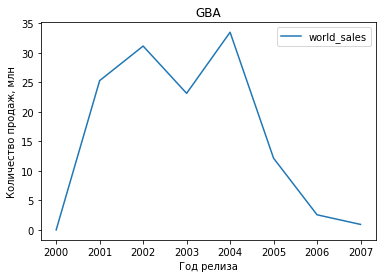

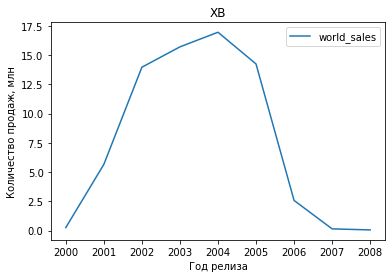

In [28]:
for platform in top_platforms:
    platform_pivot_table = df[df['platform'] == platform].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum')
    print(platform)
    print(platform_pivot_table, '\n\n')
    platform_pivot_table.plot()
    plt.title(platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Количество продаж, млн')

In [29]:
df.query('platform == "DS" and year_of_release < 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,unknown,0.02


Так как мы обнаружили нереальное значение в данных, удалим его и проведем повторно исследовательский анализ жизни платформ.

PS2
                 world_sales
year_of_release             
2000                   23.09
2001                   86.94
2002                  108.84
2003                  100.77
2004                  115.03
2005                   75.06
2006                   53.49
2007                   43.94
2008                   32.67
2009                   17.04
2010                    3.45
2011                    0.32 


DS
                 world_sales
year_of_release             
2004                    8.94
2005                   82.15
2006                   69.80
2007                   71.69
2008                   67.19
2009                   58.59
2010                   44.22
2011                   11.91
2012                    6.99
2013                    0.97 


PS3
                 world_sales
year_of_release             
2006                   12.12
2007                   41.03
2008                   61.29
2009                   68.28
2010                   81.18
2011                   91.

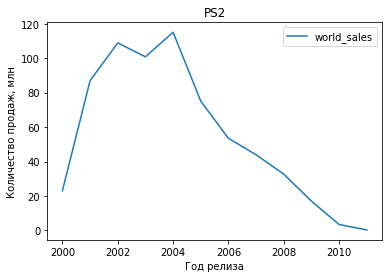

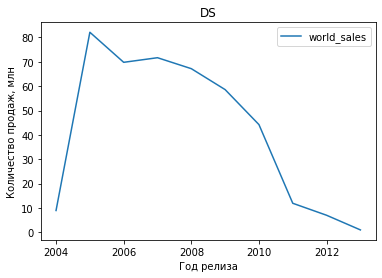

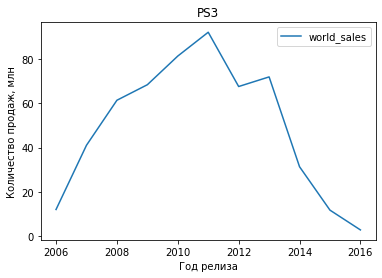

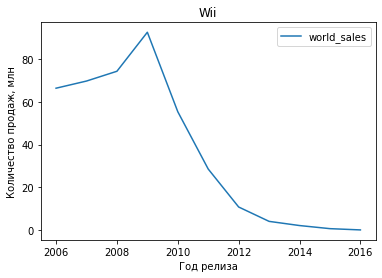

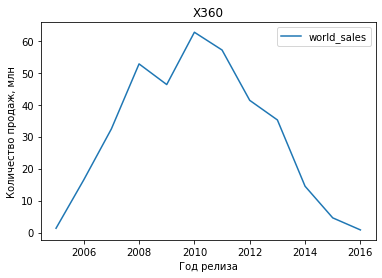

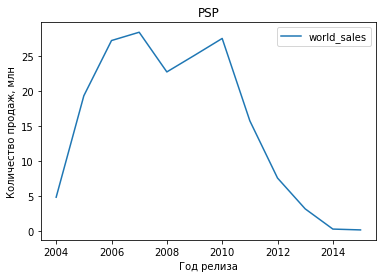

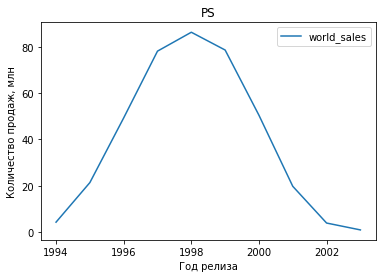

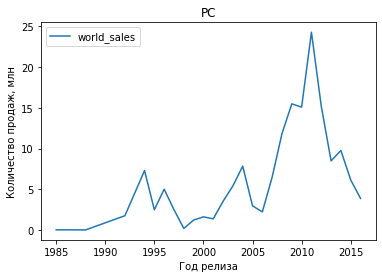

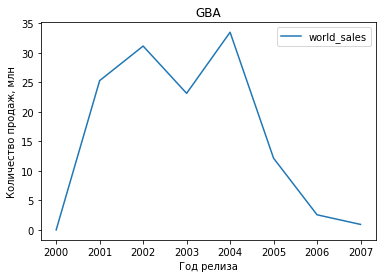

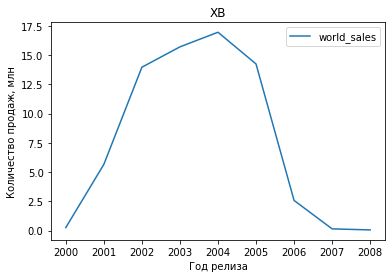

In [30]:
df.drop(index=15957, inplace=True)

for platform in top_platforms:
    platform_pivot_table = df[df['platform'] == platform].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum')
    print(platform)
    print(platform_pivot_table, '\n\n')
    platform_pivot_table.plot()
    plt.title(platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Количество продаж, млн')

**Вывод**

По графикам и полученным таблицам можно заметить, что платформы как правило живут 5-10 лет. Как правило, выходит или обновление платформы, как это видно с PlayStation или какие-то технологии устаревают вовсе, как например PSP или Nintendo. Интересная картина с PC, потому что в пиках на графике у таких игр скачиваний гораздо меньше, чем у других платформ, однако PC будет всегда, он не будет менять версию, а следовательно, он всегда будет иметь хотя бы средний спрос.

Для дальнейшего прогнозирования на 2017 год необходимо будет выбирать платформы, популярность которых высока, но при этом их жизненный цикл еще не близок к концу. Таким образом, нам необходимы платформы, которые имеют высокую популярность последние 1-4 лет. В качестве актуального периода возьмем 4 года, потому что если взять больший промежуток, то только вышедшие платформы и еще не успевшие набрать популярность не попадут в наш топ и соответсвенно исследование исказится. А для оценки этапа развития платформы будем пользоваться уже полученными графиками.

### Исследование актуальных платформ

Актуальный год мы определили в 4 года, это позволит и оценить популярность платформы в последние 4 года, а так же примерно понять на каком этапе находится платформа: только вышла или уже заканчивает свою эксплуатацию.

In [31]:
actual_year = 2013
actual_platforms = list(df[df['year_of_release'] >= actual_year].pivot_table(index='platform', values='name', aggfunc='count')
                  .sort_values(by='name', ascending=False)
                  .head(10)
                  .reset_index()['platform'])
actual_platforms

['PS4', 'PSV', 'PS3', '3DS', 'XOne', 'PC', 'X360', 'WiiU', 'PSP', 'Wii']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   uint16 
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float32
 9   user_score       2233 non-null   float32
 10  rating           2233 non-null   object 
 11  world_sales      2233 non-null   float64
dtypes: float32(2), float64(5), object(4), uint16(1)
memory usage: 178.9+ KB
PS4
                 world_sales
year_of_release             
2013                   15.86
2014                   65.25
2015                   76.53
2016                   

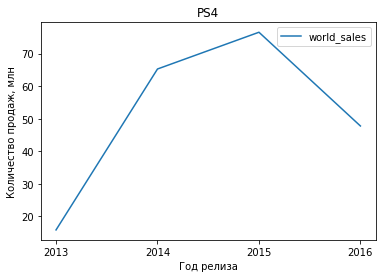

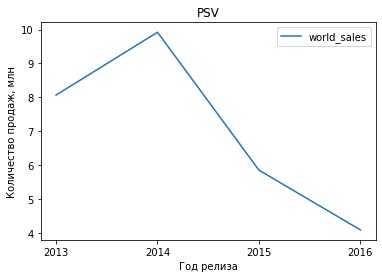

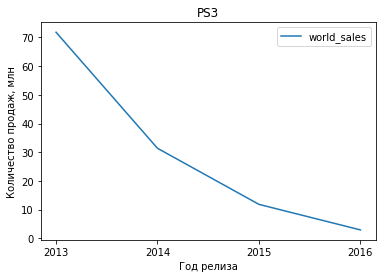

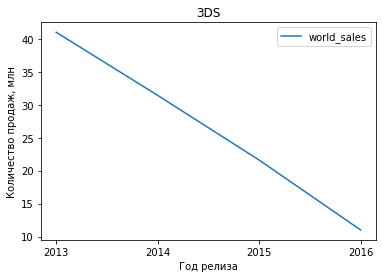

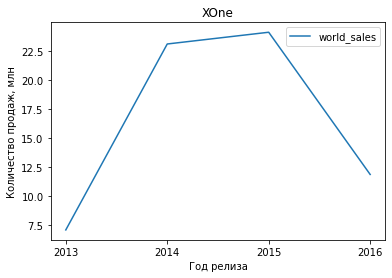

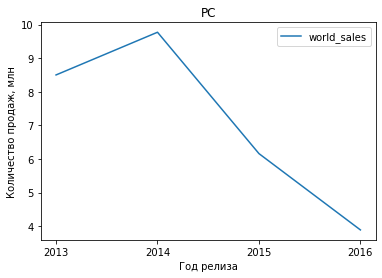

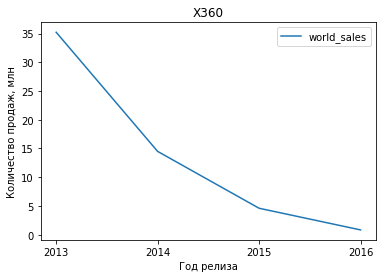

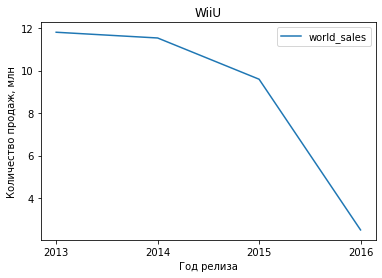

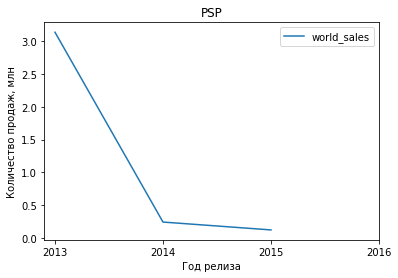

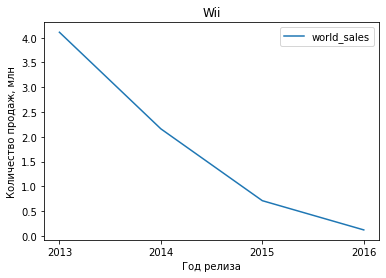

In [32]:
df_actual_platforms = df[df['year_of_release'] >= actual_year].copy().reset_index(drop= True)
df_actual_platforms.info()
for platform in actual_platforms:
    platform_pivot_table = (df_actual_platforms[df_actual_platforms['platform'] == platform]
        .pivot_table(index='year_of_release', values='world_sales', aggfunc='sum'))
    print(platform)
    print(platform_pivot_table, '\n\n')
    platform_pivot_table.plot()
    plt.title(platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Количество продаж, млн')
    plt.xticks(np.arange(actual_year, 2017, step=1))

**Вывод**

В результате было выяснено, что по всем платформам происходит просадка по количеству продаж, однако такие платформы, как PS4 и XOne появились только в 2013 году, и у них достаточно высокие продажи в соотношении с другими платформами. Вероятно, они еще будут набирать популярность в ближайшее время или хотя бы сохранят свои результаты. Не исключен также факт того, что есть какие-то внешние факторы, влияющие на такое снижение продаж на всех платформах.

### Исследование глобальных продаж

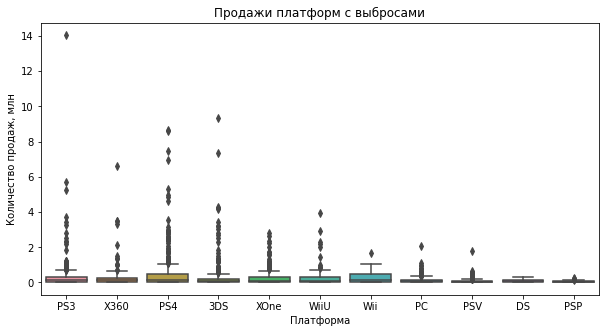

In [33]:
    plt.figure(figsize=(10,5))
    #plt.boxplot([df_actual_platforms['platform'] == platform]['world_sales'])
    sns.boxplot(data=df_actual_platforms, x='platform', y='world_sales')
    plt.title(f'Продажи платформ с выбросами')
    plt.xlabel('Платформа')
    plt.ylabel('Количество продаж, млн');

Для общей картины график подходит, но чтобы более точно рассмотреть квартили, "увеличим" график, добавив пределы.

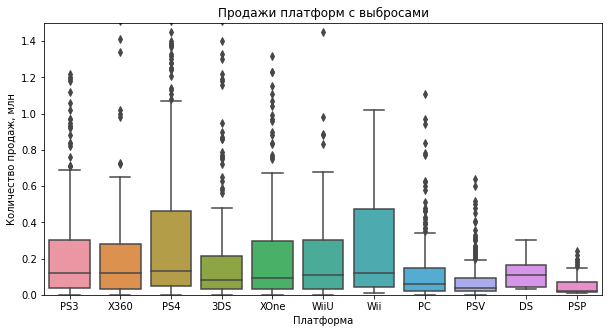

In [34]:
    plt.figure(figsize=(10,5))
    #plt.boxplot([df_actual_platforms['platform'] == platform]['world_sales'])
    sns.boxplot(data=df_actual_platforms, x='platform', y='world_sales').set(ylim=(0, 1.5))
    plt.title(f'Продажи платформ с выбросами')
    plt.xlabel('Платформа')
    plt.ylabel('Количество продаж, млн');

In [35]:
df_actual_platforms['world_sales'].describe()

count    2233.000000
mean        0.292423
std         0.759843
min         0.000000
25%         0.030000
50%         0.080000
75%         0.250000
max        14.030000
Name: world_sales, dtype: float64

**Вывод**

Судя по графикам, у всех платформ есть большое количество выбросов, однако, как уже было написано в 1 пункте, предполагаю, что это связано с успешностью игры, которая может "выстрелить", а другая - не сможет, поэтому нельзя назвать такие выбросы чем-то плохим и избавляться от них. Разные платформы также дают разные результаты по квартилям, что их квартили могут разительно отличаться от основных.

### Исследование влияния отзывов на продажи

Для начала выявим найдем корреляцию между отзывами пользователей и количеством продаж по актуальным платформам. 

Поскольку на этапе предобработки данных мы вместо пропусков добавили -1, добавим здесь условие, чтобы не учитывать эти значения.

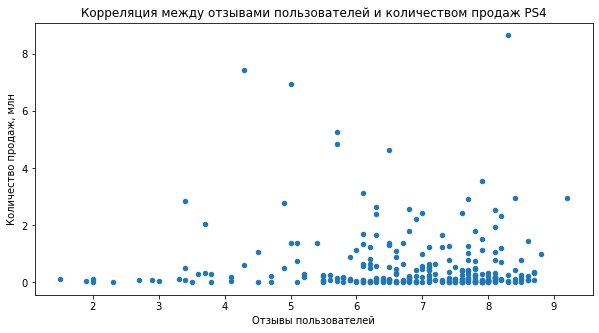

Корреляция между отзывами пользователей и количеством продаж PS4  = -0.034918341813209394


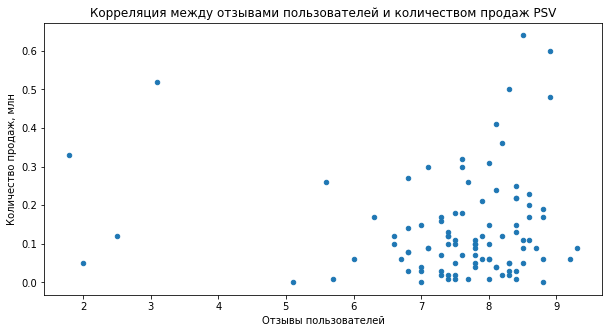

Корреляция между отзывами пользователей и количеством продаж PSV  = -0.01163828620662812


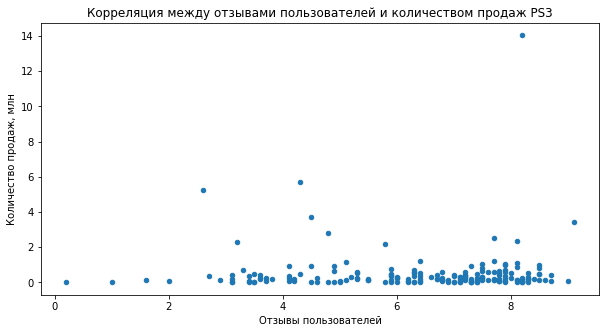

Корреляция между отзывами пользователей и количеством продаж PS3  = 0.010765894867068958


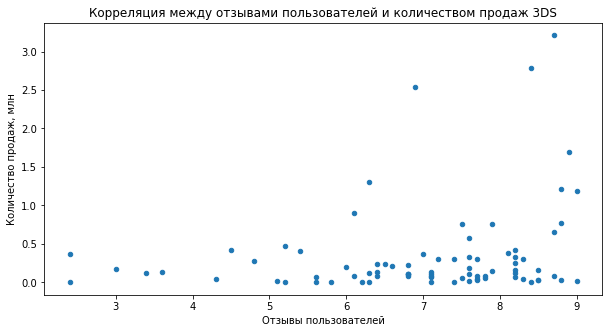

Корреляция между отзывами пользователей и количеством продаж 3DS  = 0.22499578215482996


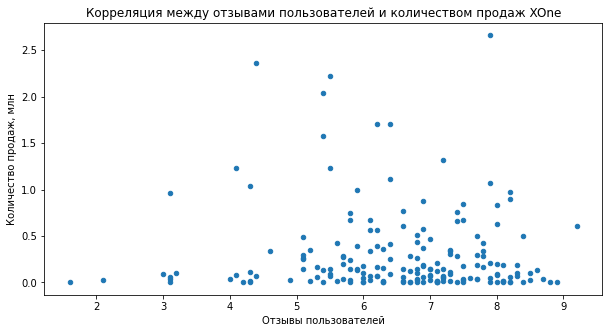

Корреляция между отзывами пользователей и количеством продаж XOne  = -0.059279145062556104


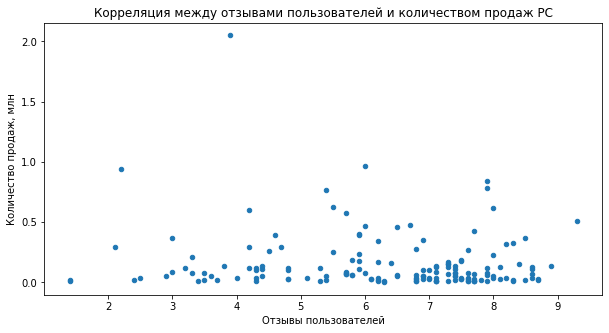

Корреляция между отзывами пользователей и количеством продаж PC  = -0.11031847249906546


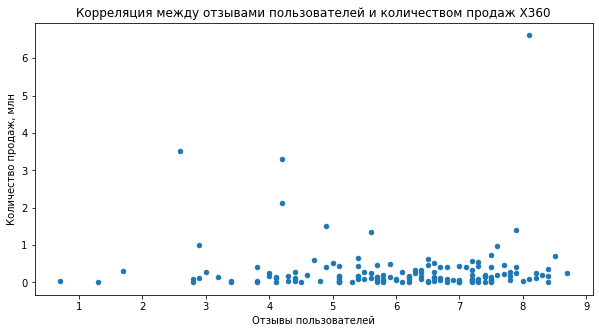

Корреляция между отзывами пользователей и количеством продаж X360  = -0.01011778030218016


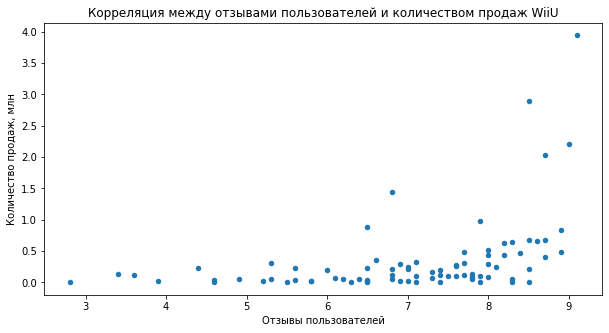

Корреляция между отзывами пользователей и количеством продаж WiiU  = 0.41333662506078617


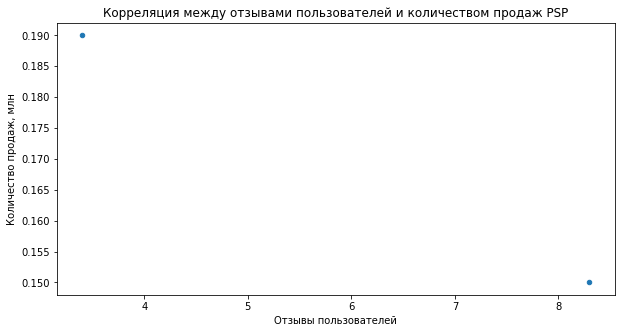

Корреляция между отзывами пользователей и количеством продаж PSP  = -0.9999999999999999


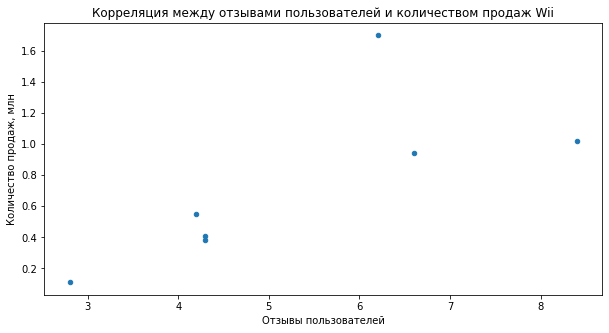

Корреляция между отзывами пользователей и количеством продаж Wii  = 0.7349057756388249


In [36]:
for platform in actual_platforms:
    (df_actual_platforms.query('platform == @platform and user_score > -1')
        .plot(x='user_score', 
          y='world_sales', 
          kind='scatter', 
          figsize=(10, 5))
    )
    plt.title(f'Корреляция между отзывами пользователей и количеством продаж {platform}')
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Количество продаж, млн')
    plt.show()
    print(f'Корреляция между отзывами пользователей и количеством продаж {platform}  =', df_actual_platforms.query('platform == @platform and user_score > -1')['user_score'].corr(df_actual_platforms.query('platform == @platform and user_score > -1')['world_sales']))

Построим аналогичные графики для отзывов критиков и найдем значение корреляции.

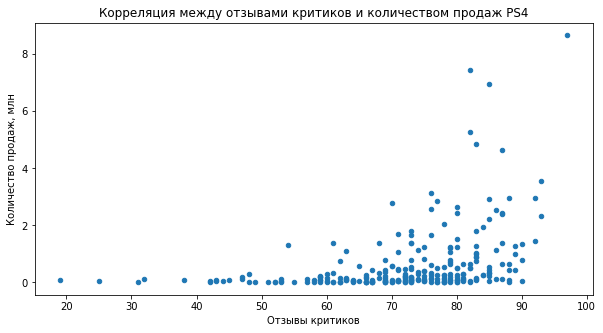

Корреляция между отзывами критиков и количеством продаж PS4  = 0.3208909584270454


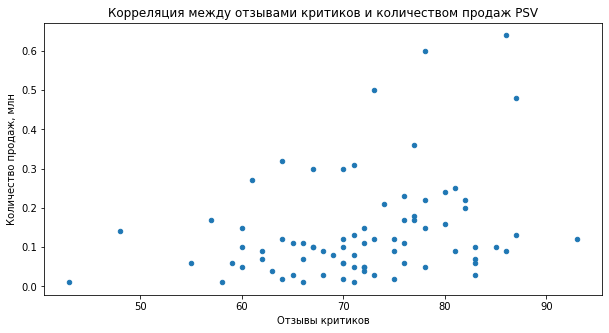

Корреляция между отзывами критиков и количеством продаж PSV  = 0.10531842408343675


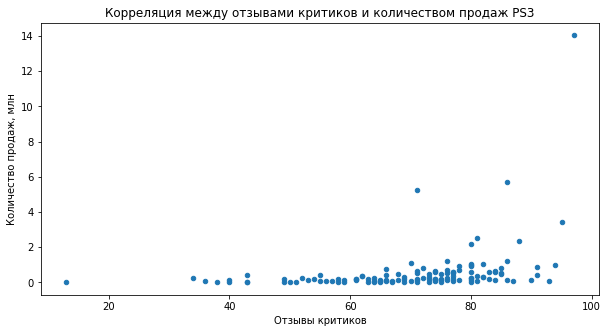

Корреляция между отзывами критиков и количеством продаж PS3  = 0.17661297162582254


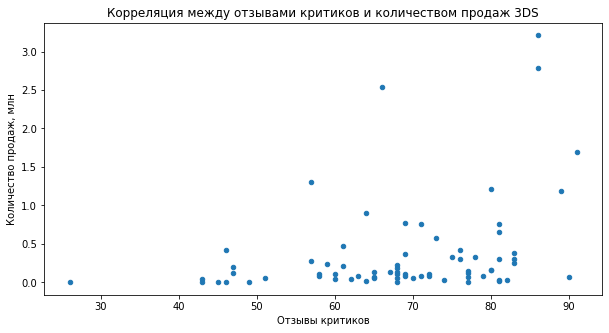

Корреляция между отзывами критиков и количеством продаж 3DS  = 0.2688602934458566


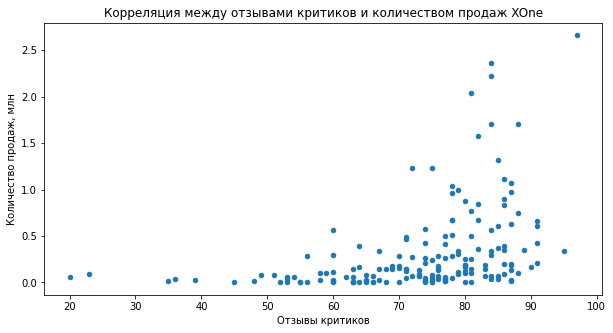

Корреляция между отзывами критиков и количеством продаж XOne  = 0.32286629761661223


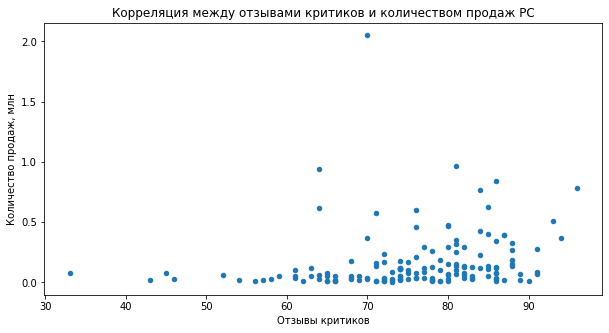

Корреляция между отзывами критиков и количеством продаж PC  = 0.19596924196680024


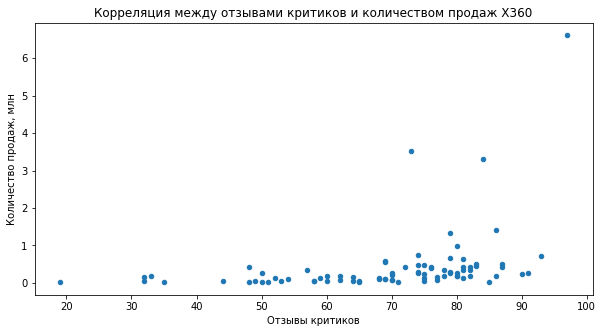

Корреляция между отзывами критиков и количеством продаж X360  = 0.24847552470934775


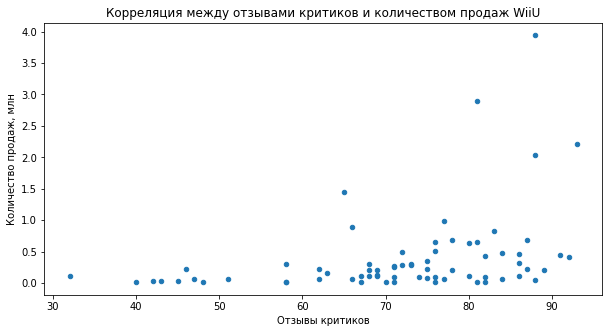

Корреляция между отзывами критиков и количеством продаж WiiU  = 0.3311997266202574


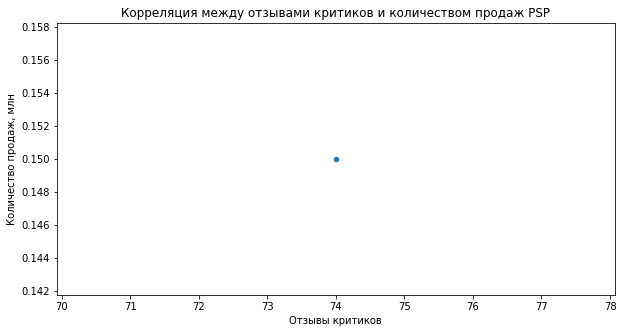

Корреляция между отзывами критиков и количеством продаж PSP  = -0.9999999999999999


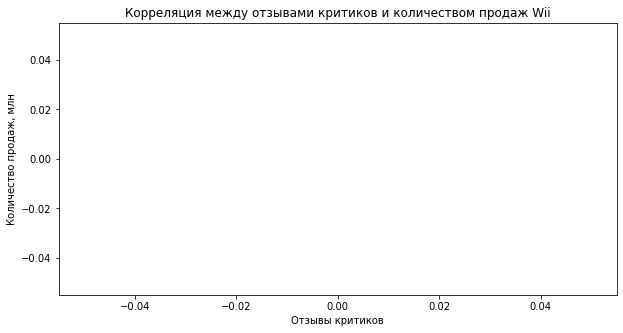

Корреляция между отзывами критиков и количеством продаж Wii  = nan


In [37]:
for platform in actual_platforms:
    (df_actual_platforms.query('platform == @platform and critic_score > -1')
        .plot(x='critic_score', 
          y='world_sales', 
          kind='scatter', 
          figsize=(10, 5))
    )
    plt.title(f'Корреляция между отзывами критиков и количеством продаж {platform}')
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Количество продаж, млн')
    plt.show()
    print(f'Корреляция между отзывами критиков и количеством продаж {platform}  =', df_actual_platforms.query('platform == @platform and user_score > -1')['critic_score'].corr(df_actual_platforms.query('platform == @platform and user_score > -1')['world_sales']))

**Вывод**

На основании полученных результатов можно сделать следующие выводы:
- Корреляция между отзывами пользователей и количеством продаж очень слабая;
- Корреляция между отзывами пользователей и количеством продаж зависит от платформы, потому что одна платформа может иметь много оценок, а другая не иметь этих данных вовсе;
- Корреляция между отзывами критиков и количеством продаж слабая, но более заметная, чем с пользователями;
- Также имеются платформы, которые не имеют данных с отзывами.

### Исследование распределения по жанрам

Было принято решение для начала построить распределение по количеству игр в различных жанрах, а затем по количеству продаж, чтобы понять количество продаж вызвано исключительно предложением (количеством игр на рынке) или есть какие-то факторы.

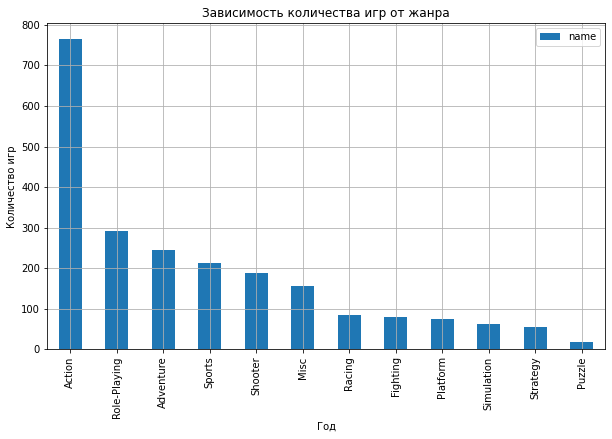

In [38]:
df_count = (df_actual_platforms.pivot_table(index='genre', values='name', aggfunc='count')
                               .sort_values(by='name', ascending=False))

df_count.plot(kind='bar', grid=True, figsize=(10,6))

plt.title('Зависимость количества игр от жанра')
plt.xlabel('Год')
plt.ylabel('Количество игр');

Для точной оценки занчений, выведем таблицу с количеством игр в каждом жанре.

In [39]:
df_count

,name
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


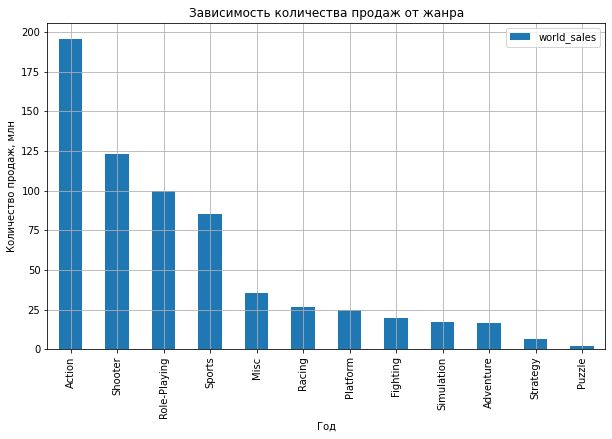

In [40]:
df_sales = (df_actual_platforms.pivot_table(index='genre', values='world_sales', aggfunc='sum')
                               .sort_values(by='world_sales', ascending=False))

df_sales.plot(kind='bar', grid=True, figsize=(10,6))

plt.title('Зависимость количества продаж от жанра')
plt.xlabel('Год')
plt.ylabel('Количество продаж, млн');

Чтобы можно было оценить занчения продаж в числах, построим таблицу.

In [41]:
df_sales

,world_sales
genre,
Action,195.82
Shooter,123.24
Role-Playing,99.49
Sports,85.38
Misc,35.33
Racing,26.93
Platform,24.49
Fighting,19.76
Simulation,16.90


Поскольку значения лишь количества продаж плохо оценивают общее состояние дел, было принято решение дополнить их двумя дополнительными характеристиками: медианой по количеству продаж и значением конверсии, количества продаж на количество игр в данном жанре. Объединим все эти значения в одной сводной таблице.

In [42]:
df_total = pd.merge(df_count, df_sales, on='genre')
df_total['conversion'] = (df_total['world_sales'] * 1_000_000) / (df_total['name'])
df_sales_median = (df_actual_platforms.pivot_table(index='genre', values='world_sales', aggfunc='median')
                                      .sort_values('world_sales', ascending=False))
df_total.rename(columns={'name':'count_games', 'world_sales':'world_sales_M'}, inplace=True)
df_total = pd.merge(df_total, df_sales_median, on='genre')
df_total.rename(columns={'world_sales':'world_sales_median_M'}, inplace=True)
df_total.sort_values(by='world_sales_median_M', ascending=False)

,count_games,world_sales_M,conversion,world_sales_median_M
genre,,,,
Shooter,187,123.24,659037.433155,0.270
Sports,214,85.38,398971.962617,0.130
Platform,74,24.49,330945.945946,0.125
Role-Playing,292,99.49,340719.178082,0.100
Fighting,80,19.76,247000.000000,0.085
Action,766,195.82,255639.686684,0.080
Misc,155,35.33,227935.483871,0.080
Racing,85,26.93,316823.529412,0.070
Simulation,62,16.90,272580.645161,0.070


**Вывод**

В данном пункте были высянено следующее:
- Наиболее прибыльными игровыми жанрами являются Shooter, Sports, Platform и Role-Playing.
- Не смотря на то, что в жанре Action очень много игр, его медианное значение и конверсия являются средними.

###  Вывод

По исследовательскому анализу можно сделать следующие выводы:
1. Количество выпускаемых игр снизилось в 2012 году и находится сейчас на примерно одном уровне, 600 игр в год.

2. Игровые платформы, как правило, живут 5-10 лет. Как правило, выходит или обновление платформы, как это видно с PlayStation или какие-то технологии устаревают вовсе, как например PSP или Nintendo. Интересная картина с PC, потому что в пиках на графике у таких игр скачиваний гораздо меньше, чем у других платформ, однако PC будет всегда, он не будет менять версию, а следовательно, он всегда будет иметь хотя бы средний спрос. Акутальным периодом для прогнозирования было выбрано 4 года, потому что если взять больший промежуток, то только вышедшие платформы и еще не успевшие набрать популярность не попадут в наш топ и соответсвенно исследование исказится. А для оценки этапа развития платформы будем пользоваться уже полученными графиками.

3. По всем акутальным платформам происходит просадка по количеству продаж, однако такие платформы, как PS4 и XOne появились только в 2013 году, и у них достаточно высокие продажи в соотношении с другими платформами. Вероятно, они еще будут набирать популярность в ближайшее время или хотя бы сохранят свои результаты. Не исключен также факт того, что есть какие-то внешние факторы, влияющие на такое снижение продаж на всех платформах.

4. У всех платформ есть большое количество выбросов, однако, как уже было написано в 1 пункте, предполагаю, что это связано с успешностью игры, которая может "выстрелить", а другая - не сможет, поэтому нельзя назвать такие выбросы чем-то плохим и избавляться от них. Разные платформы также дают разные результаты по квартилям, что их квартили могут разительно отличаться от основных.

5. Корреляция между отзывами пользователей и количеством продаж очень слабая. Корреляция между отзывами критиков и количеством продаж слабая, но более заметная, чем с пользователями. Корреляция между отзывами и количеством продаж зависит от платформы, потому что одна платформа может иметь много оценок, а другая не иметь этих данных вовсе.

6. Наиболее прибыльными игровыми жанрами являются Shooter, Sports, Platform и Role-Playing.

## Составление портрета пользователя

### Топ популярных платформ в различных регионах

In [43]:
na_platforms = (df_actual_platforms
        .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index())
na_platforms.loc[5:,'platform'] = 'Other'
na_platforms.loc[5,'na_sales'] =  na_platforms.loc[5:,'na_sales'].sum()
na_platforms = na_platforms.loc[0:5]
na_platforms

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,Other,52.49


In [44]:
jp_platforms = (df_actual_platforms
        .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index())
jp_platforms.loc[5:,'platform'] = 'Other'
jp_platforms.loc[5,'jp_sales'] =  jp_platforms.loc[5:,'jp_sales'].sum()
jp_platforms = jp_platforms.loc[0:5]
jp_platforms

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,Other,4.19


In [45]:
eu_platforms = (df_actual_platforms
        .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index())
eu_platforms.loc[5:,'platform'] = 'Other'
eu_platforms.loc[5,'eu_sales'] =  eu_platforms.loc[5:,'eu_sales'].sum()
eu_platforms = eu_platforms.loc[0:5]
eu_platforms

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
5,Other,58.26


In [46]:
# Объединим таблицы для более наглядного сравнения регионов
total_table_platform = pd.merge(na_platforms, jp_platforms, left_index=True, right_index=True)
total_table_platform = pd.merge(total_table_platform, eu_platforms, left_index=True, right_index=True)
total_table_platform.rename(columns = {'platform_x':'platform_na', 'platform_y':'platform_jp', 'platform':'platform_eu'}, inplace = True )
total_table_platform

,platform_na,na_sales,platform_jp,jp_sales,platform_eu,eu_sales
0,PS4,108.74,3DS,67.81,PS4,141.09
1,XOne,93.12,PS3,23.35,PS3,67.81
2,X360,81.66,PSV,18.59,XOne,51.59
3,PS3,63.50,PS4,15.96,X360,42.52
4,3DS,38.20,WiiU,10.88,3DS,30.96
5,Other,52.49,Other,4.19,Other,58.26


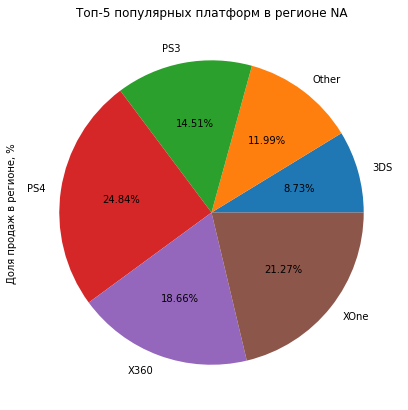

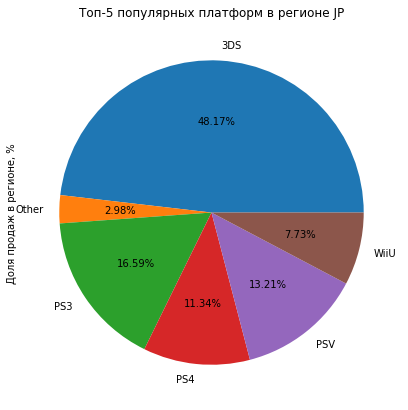

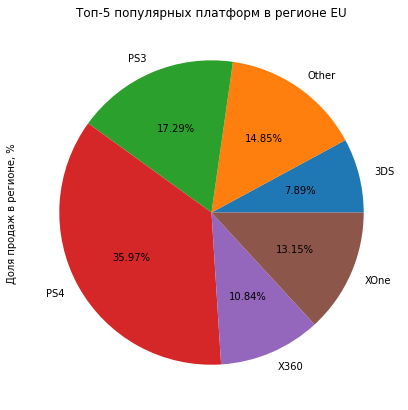

In [47]:
for region in  ['na', 'jp', 'eu']:
    current_platform = f'platform_{region}'
    current_sales = f'{region}_sales'
    (total_table_platform.pivot_table(index=current_platform, values=current_sales, aggfunc='sum')
     .plot(kind='pie', y=current_sales, figsize=(7, 7), autopct='%1.2f%%', legend=False)
     .set(ylabel='Доля продаж в регионе, %')
    )
    plt.title(f'Топ-5 популярных платформ в регионе {region.upper()}')
    plt.show()

**Вывод**

Платформы в Европе и Северной Америке одинаковые с небольшой разницей по популярности PS и Xbox, наибольшее предпочтение и там и там отдается PS4. В Японии же преобладают местные производители, такие как Nintendo и PlayStation, наиболее популярной является платформа Nintendo 3DS.

### Топ популярных жанров в различных регионах

In [48]:
na_genres = (df_actual_platforms
        .pivot_table(index='genre', values='na_sales', aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index())
na_genres.loc[5:,'genre'] = 'Other'
na_genres.loc[5,'na_sales'] =  na_genres.loc[5:,'na_sales'].sum()
na_genres = na_genres.loc[0:5]
na_genres

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Other,62.76


In [49]:
jp_genres = (df_actual_platforms
        .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index())
jp_genres.loc[5:,'genre'] = 'Other'
jp_genres.loc[5,'jp_sales'] =  jp_genres.loc[5:,'jp_sales'].sum()
jp_genres = jp_genres.loc[0:5]
jp_genres

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61
5,Other,25.79


In [50]:
eu_genres = (df_actual_platforms
        .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index())
eu_genres.loc[5:,'genre'] = 'Other'
eu_genres.loc[5,'eu_sales'] =  eu_genres.loc[5:,'eu_sales'].sum()
eu_genres = eu_genres.loc[0:5]
eu_genres

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,Other,68.56


In [51]:
# Объединим таблицы для более наглядного сравнения регионов
total_table_genre = pd.merge(na_genres, jp_genres, left_index=True, right_index=True)
total_table_genre = pd.merge(total_table_genre, eu_genres, left_index=True, right_index=True)
total_table_genre.rename(columns = {'genre_x':'genre_na', 'genre_y':'genre_jp', 'genre':'genre_eu'}, inplace = True )
total_table_genre

,genre_na,na_sales,genre_jp,jp_sales,genre_eu,eu_sales
0,Action,126.05,Role-Playing,51.04,Action,118.13
1,Shooter,109.74,Action,40.49,Shooter,87.86
2,Sports,65.27,Misc,9.20,Sports,60.52
3,Role-Playing,46.40,Fighting,7.65,Role-Playing,36.97
4,Misc,27.49,Shooter,6.61,Racing,20.19
5,Other,62.76,Other,25.79,Other,68.56


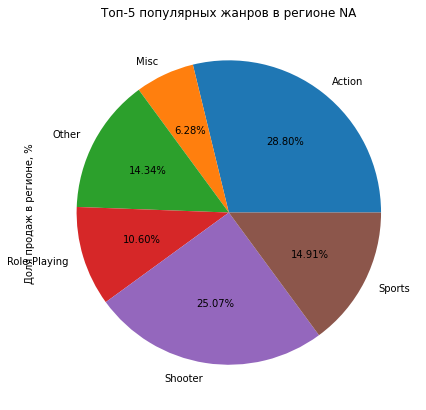

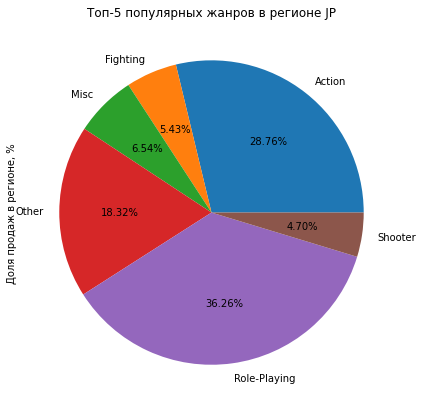

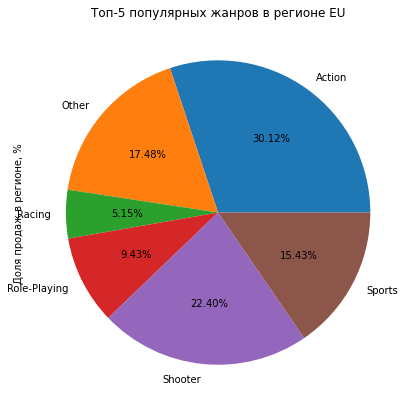

In [52]:
for region in  ['na', 'jp', 'eu']:
    current_genre = f'genre_{region}'
    current_sales = f'{region}_sales'
    (total_table_genre.pivot_table(index=current_genre, values=current_sales, aggfunc='sum')
     .plot(kind='pie', y=current_sales, figsize=(7, 7), autopct='%1.2f%%', legend=False)
     .set(ylabel='Доля продаж в регионе, %')
    )
    plt.title(f'Топ-5 популярных жанров в регионе {region.upper()}')
    plt.show()

**Вывод**

Самые популярные жанры практически одинаковые во всех регионах, но у них разное распределение. В Северной Америке наиболее популярными являются Action, Shooter, Sports. В Японии наиболее популярными являются Role-Playing, Action и Misc. В Европе наиболее популярными являются Action, Shooter и Sports, но разница с Северной Америкой в том, что в Европе, на 5 месте стоит не Misc, а Racing.

### Влияние рейтинга ESRB в различных регионах

In [53]:
na_rating = (df_actual_platforms.pivot_table(index='rating', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index())
jp_rating = (df_actual_platforms.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index())
eu_rating = (df_actual_platforms.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index())

# Объединим таблицы для более наглядного сравнения регионов
total_table_rating = pd.merge(na_rating, jp_rating, left_index=True, right_index=True)
total_table_rating = pd.merge(total_table_rating, eu_rating, left_index=True, right_index=True)
total_table_rating.rename(columns = {'rating_x':'rating_na', 'rating_y':'rating_jp', 'rating':'rating_eu'}, inplace = True )
total_table_rating

,rating_na,na_sales,rating_jp,jp_sales,rating_eu,eu_sales
0,M,165.21,unknown,85.05,M,145.32
1,unknown,89.42,T,20.59,E,83.36
2,E,79.05,E,15.14,unknown,78.91
3,E10+,54.24,M,14.11,E10+,42.69
4,T,49.79,E10+,5.89,T,41.95


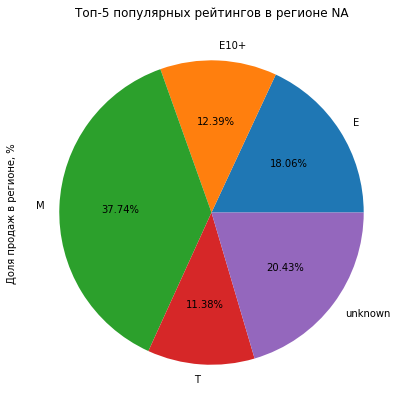

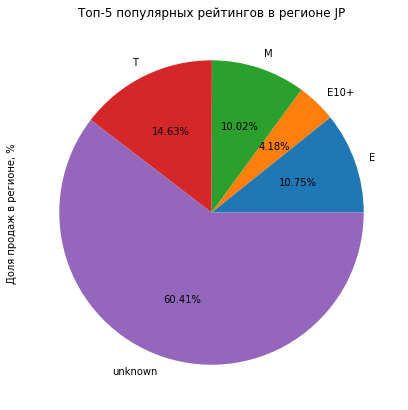

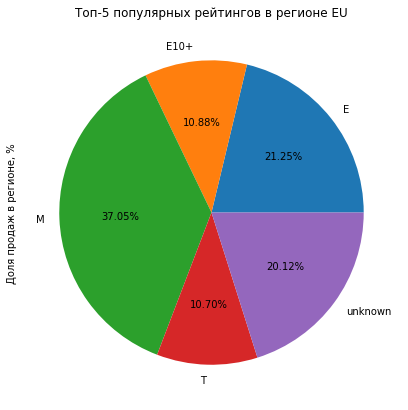

In [54]:
for region in  ['na', 'jp', 'eu']:
    current_rating = f'rating_{region}'
    current_sales = f'{region}_sales'
    (total_table_rating.pivot_table(index=current_rating, values=current_sales, aggfunc='sum')
     .plot(kind='pie', y=current_sales, figsize=(7, 7), autopct='%1.2f%%', legend=False)
     .set(ylabel='Доля продаж в регионе, %')
    )
    plt.title(f'Топ-5 популярных рейтингов в регионе {region.upper()}')
    plt.show()

**Вывод**

В регионах Северной Америки и Европы преобладает рейтинг M(17+), а в Японии неизвестный рейтинг 'unknown', однако после него следует рейтинг T(13+). Наиболее популярные рейтинги для всех регионов это M, E и E10+.

### Вывод

В ходе составления портрета пользователя для каждого региона были сделаны следующие выводы:
1. Северная Америка:
    - По платформам лидируют PS4, XOne, X360;
    - По жанрам лидируют Action, Shooter и Sports;
    - По рейтингу лидирует M(17+).
2. Япония:
    - По платформам лидируют 3DS, PS3, PSV;
    - По жанрам лидируют Role-Playing, Action, Misc;
    - По рейтингу лидирует unknown, после него T.
3. Европа:
    - По платформам лидируют PS4, PS3, XOne;
    - По жанрам лидируют Action, Shooter, Sports;
    - По рейтингу лидирует M(17+).

## Работа с гипотезами

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

Сформируем следующие гипотезы:
   - H0: Средний пользовательский рейтинг Xbox One **равен** среднему пользовательскому рейтингу PC.
   - H1: Средний пользовательский рейтинг Xbox One **не равен** среднему пользовательскому рейтингу PC.
   
Уровень статистической значимости примем 5%.

In [55]:
xone = df_actual_platforms.query('platform == "XOne" and user_score > -1')
xone['user_score'].describe()

count    182.000000
mean       6.521428
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

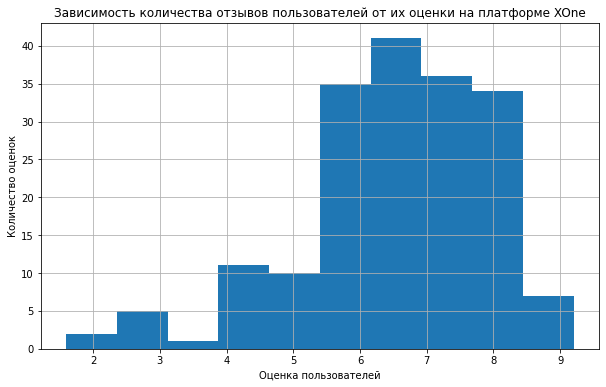

In [56]:
xone['user_score'].plot(kind='hist', grid=True, figsize=(10,6))

plt.title('Зависимость количества отзывов пользователей от их оценки на платформе XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество оценок');

In [57]:
pc = df_actual_platforms.query('platform == "PC" and user_score > -1')
pc['user_score'].describe()

count    155.000000
mean       6.269678
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

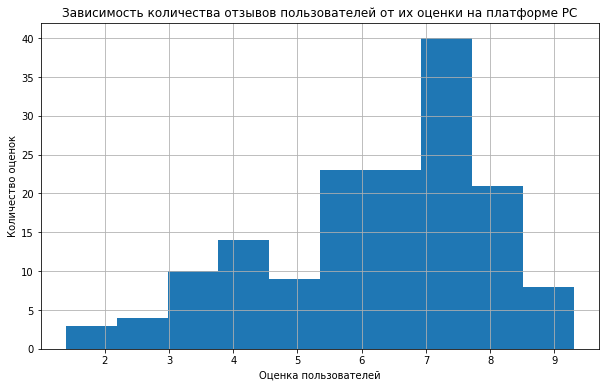

In [58]:
pc['user_score'].plot(kind='hist', grid=True, figsize=(10,6))

plt.title('Зависимость количества отзывов пользователей от их оценки на платформе PC')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество оценок');

In [59]:
alpha = 0.05

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'], 
    alternative='two-sided')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.14012765210016784
Не получилось отвергнуть нулевую гипотезу


**Вывод**

p-value равно 14 процентам, следовательно, мы не можем отвергнуть нулевую гипотезу, поэтому может предположить, что рейтинги платформ XOne и PC не имеют статистически значимых отличий.

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные?

Сформируем следующие гипотезы:

   - H0: Средний пользовательский рейтинг Action **равен** среднему пользовательскому рейтингу Sports.
   - H1: Средний пользовательский рейтинг Action **не равен** среднему пользовательскому рейтингу Sports.
   
Уровень статистической значимости примем 5%.

In [60]:
action = df_actual_platforms.query('genre == "Action" and user_score > -1')
action['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

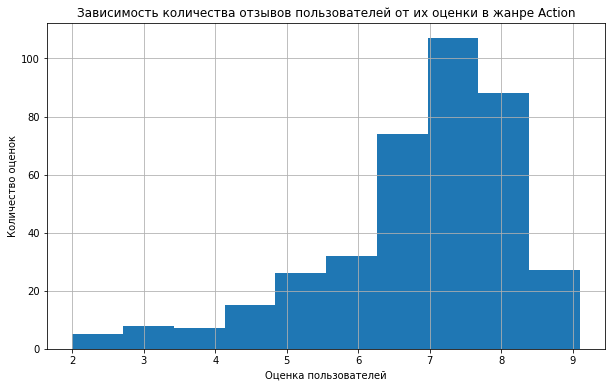

In [61]:
action['user_score'].plot(kind='hist', grid=True, figsize=(10,6))

plt.title('Зависимость количества отзывов пользователей от их оценки в жанре Action')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество оценок');

In [62]:
sports = df_actual_platforms.query('genre == "Sports" and user_score > -1')
sports['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

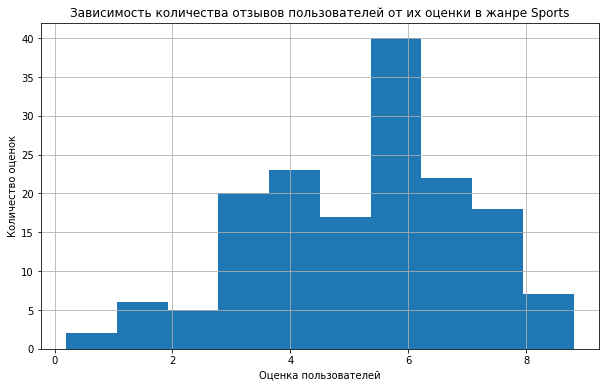

In [63]:
sports['user_score'].plot(kind='hist', grid=True, figsize=(10,6))

plt.title('Зависимость количества отзывов пользователей от их оценки в жанре Sports')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество оценок');

In [64]:
alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'], 
    alternative='two-sided')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.0517772011408453e-27
Отвергаем нулевую гипотезу


**Вывод**

Поскольку p-value мало, мы отвергаем нулевую гипотезу и соответственно это означает, что средние рейтинги жанров Action и Sports имеют статистически значимые отличия.

### Вопросы


#### Вопрос 1. Как вы сформулировали нулевую и альтернативную гипотезы?

В первом случае, вопрос состоял в равенстве оценок, поэтому нулевой гипотезой стала именно гипотеза о равенстве. Альтернативная же гипотеза была выбрана двусторонней из-за того, что не стояло вопроса меньше или больше.

Во втором случае, вопрос стоял о неравенстве рейтингов, но так как обычно нулевой гипотезой берется гипотеза о равенстве, они и была выбрана. В случае опровержения нулевой гипотезы, мы как раз таки положительно ответим на вопрос о неравенстве рейтингов в разных жанрах.

#### Вопрос 2. Какой критерий применили для проверки гипотез и почему?

Для проверки гипотез было применено сравнение p-value с уровнем статистической значимости. Было выбрано среднее значение статистической значимости в 5 процентов. P-значение показывает вероятность получения необычных или предельных значений, а сравнивая его с порогом статистической значимости, мы можем решить считать полученные исходы или статистически значимыми.

## Общий вывод

В ходе проведенного исследования был проделан следующий ряд работ и сделаны следующие выводы:

1. Открыт и изучен файл
    - Всего в датасете 16715 строк и 11 столбцов;
    - Данные были признаны поллными и пригодными для исследования.
2. Проведена предобработка данных:
    - Были изменены названия столбцов;
    - Явных дубликатов обнаружено не было;
    - Неявных дубликатов обнаружено 2, они были удалены;
    - Были обработаны пропуски в данных:
        - В столбцах `name` и `year_of_release` строки с пропусками были удалены;
        - В столбце `rating` пропуски были заменены на 'unknown';
        - В столбцах `critic_score` и `user_score` пропуски были заменены на -1;
        - В случае с удаленнными строками, пропуски были вызваны вероятно техническими проблемами;
        - В случае столбцов `critic_score` и `user_score`, вероятно рейтинг для данных игр или никогда не составлялся или был еще в процессе.
    - Были изучены вбросы в данных в столбцах с количеством продаж и было выяснено, что это реальные значения, поэтому они были оставлены;
    - Были изменены типы данных в столбцах `year_of_release`, `critic_score` и `user_score` для оптимальной работы с датасетом;
    - Был добавлен дополнительный столбец `world_sales` - мировые продажи, полученный суммой значений из столбцов продаж из различных регионов.

3. Проведен исследовательский анализ данных:
    - Количество выпускаемых игр снизилось в 2012 году и находится сейчас на примерно одном уровне, 600 игр в год.
    - Игровые платформы, как правило, живут 5-10 лет. Как правило, выходит или обновление платформы, как это видно с PlayStation или какие-то технологии устаревают вовсе, как например PSP или Nintendo. Интересная картина с PC, потому что в пиках на графике у таких игр скачиваний гораздо меньше, чем у других платформ, однако PC будет всегда, он не будет менять версию, а следовательно, он всегда будет иметь хотя бы средний спрос. Акутальным периодом для прогнозирования было выбрано 4 года, потому что если взять больший промежуток, то только вышедшие платформы и еще не успевшие набрать популярность не попадут в наш топ и соответсвенно исследование исказится. А для оценки этапа развития платформы будем пользоваться уже полученными графиками.
    - По всем акутальным платформам происходит просадка по количеству продаж, однако такие платформы, как PS4 и XOne появились только в 2013 году, и у них достаточно высокие продажи в соотношении с другими платформами. Вероятно, они еще будут набирать популярность в ближайшее время или хотя бы сохранят свои результаты. Не исключен также факт того, что есть какие-то внешние факторы, влияющие на такое снижение продаж на всех платформах.
    - У всех платформ есть большое количество выбросов, однако, как уже было написано в 1 пункте, предполагаю, что это связано с успешностью игры, которая может "выстрелить", а другая - не сможет, поэтому нельзя назвать такие выбросы чем-то плохим и избавляться от них. Разные платформы также дают разные результаты по квартилям, что их квартили могут разительно отличаться от основных.
    - Корреляция между отзывами пользователей и количеством продаж очень слабая. Корреляция между отзывами критиков и количеством продаж слабая, но более заметная, чем с пользователями. Корреляция между отзывами и количеством продаж зависит от платформы, потому что одна платформа может иметь много оценок, а другая не иметь этих данных вовсе.
    - Наиболее прибыльными игровыми жанрами являются Shooter, Sports, Platform и Role-Playing.
    
4. Составлен портрет пользователя для каждого региона:
    - Северная Америка:
        - По платформам лидируют PS4, XOne, X360;
        - По жанрам лидируют Action, Shooter и Sports;
        - По рейтингу лидирует M(17+).
    - Япония:
        - По платформам лидируют 3DS, PS3, PSV;
        - По жанрам лидируют Role-Playing, Action, Misc;
        - По рейтингу лидирует unknown, после него T. Вероятно, пропуски, которые были заменены на unknown были вызваны несостыковкой zпонского рейтинга EOCS и рейтинга ESRB. Для более точного анализа в будущем необходимо будет сделать преобразования японского рейтинга в общий рейтинг для работы ESRB.
    - Европа:
        - По платформам лидируют PS4, PS3, XOne;
        - По жанрам лидируют Action, Shooter, Sports;
        - По рейтингу лидирует M(17+).
5. Выдвинуты и доказаны гипотезы о параметрах датафрейма:
    - Средние пользовательские оценки Xbox One не имеют статистически значимых отличий;
    - Средние рейтинги жанров Action и Sports имеют статистически значимые отличия.
7. Итоговый вывод:
    - Поскольку запросы в разных странах немного отличаются, для Северной Америки и Европы необходимо приоритетно проводить рекламные кампании по играм на PS4 в жанре Shooter или Sports с рейтингом M. В Японии необходимо сделать упор на платформе Nintendo 3DS и PS3 в жанрах Role-Playing и Action с рейтингом T.